## Simulate LSST light curves of lensed type Ia supernovae

### Import python libraries, LSST characteristics and functions

In [1]:
import pickle as pickle
from class_telescope import Telescope
from image_time_series import simulate_time_series_images
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rc("font", family="serif")
plt.rc("text", usetex=True)

### Parameter distributions 

Sample $z_l$, $z_s$ and $\theta_E$ from MC sample from Wojtak et al. (2019).


In [2]:
# ---------------------------------
telescope = 'LSST'
num_samples = 10000
# ---------------------------------

lsst = Telescope(telescope, num_samples)


Setting up OpSim Summary generator...
 reading from database sqlite:///../data/OpSim_databases/baseline_v3.0_10yrs.db
We have filterNull set to False
checking that summary table read in

Reading in raw tables successful
replacing names works
dropping duplicates works
dithered column names exists 
Changing units for fbsv2 from degrees


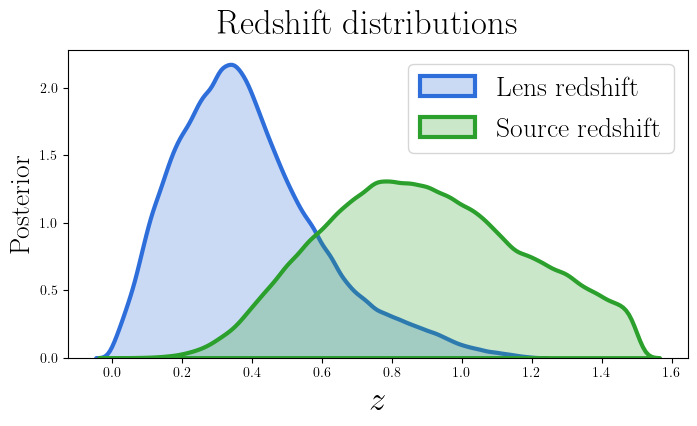

In [3]:
lsst.plot_redshifts()

### Generation of training and test sets


  0%|                                                       | 0/1 [00:00<?, ?it/s]

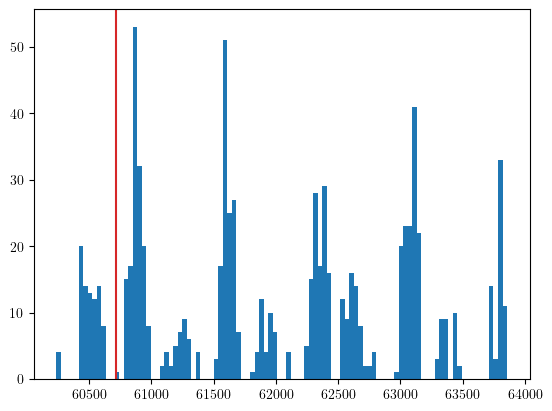

Theoretically visible with image multiplicity method?            True
Theoretically visible with magnification method?                 False
Observations allow for detection with image multiplicity method? False
Observations allow for detection with magnification method?      False
Microlensing allow for detection with image multiplicity method? False
Microlensing allow for detection with magnification method?      False
 
Lens redshift:  0.13
Supernova redshift:  0.56
Einstein radius:  1.09
Time delays:  [ 0.   23.47] days
Macro magnification:  [2.72 0.85]
Microlensing contribution at peak (magnitudes):  [0.51 0.12]
Hubble constant:  67.8
Time-delay distance:  758.75
Peak brightness images for r,i,z,y bands:
[[  inf   inf]
 [24.16 23.87]
 [24.25 24.09]
 [23.16 23.85]
 [24.36   inf]]
 


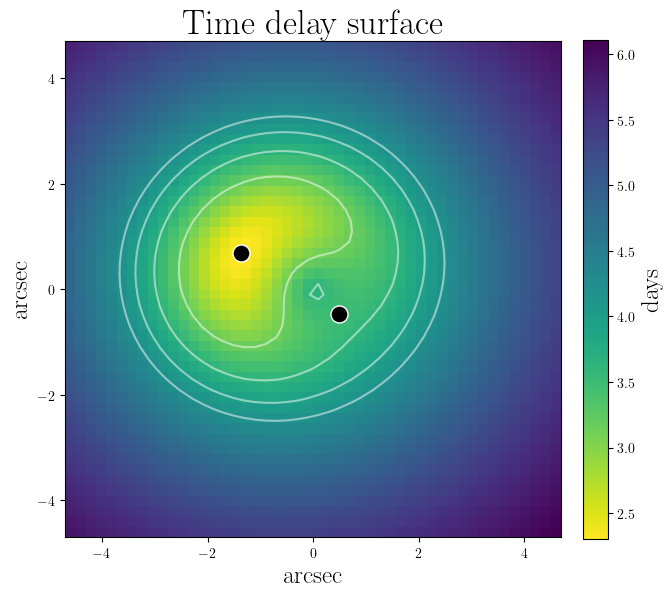

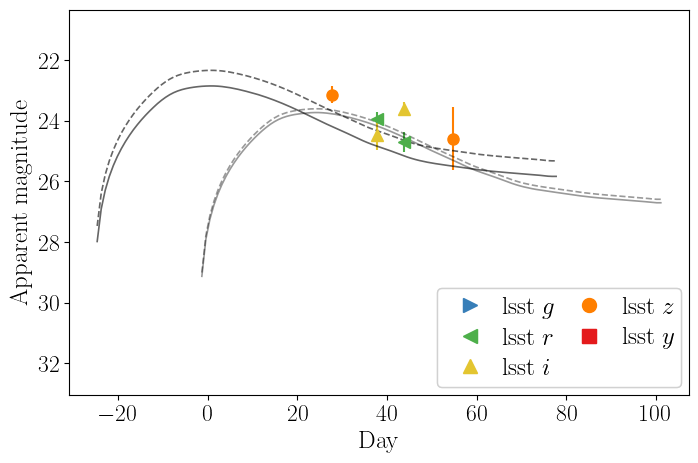

100%|███████████████████████████████████████████████| 1/1 [00:04<00:00,  4.45s/it]


Done!
Simulating images took  4.0 seconds ( 0.0 hours) to complete.
Number of image-time series generated:  1
Number of configurations tried:  1
Number of attempts:  4
 
N_missed =  0
  time_series  z_source   z_lens    H0   theta_E  \
0         NaN  0.559105  0.13071  67.8  1.090301   

                                            obs_peak  \
0  [[inf, inf], [24.159380213965473, 23.869451003...   

                                           obs_times  \
0  [-31.182099168472632, 27.838173869487946, 27.8...   

                                           obs_bands  \
0  [z, z, y, r, i, r, i, z, y, z, r, y, y, i, r, ...   

                                           model_mag  \
0  [[inf, inf], [22.984065513130076, 23.539445045...   

                                             obs_mag  ... survey     rolling  \
0  [[inf, inf], [23.157238494612972, 23.845852111...  ...    WFD  no rolling   

                                       obs_mag_micro  \
0  [[inf, inf], [23.78738576575619, 24.014

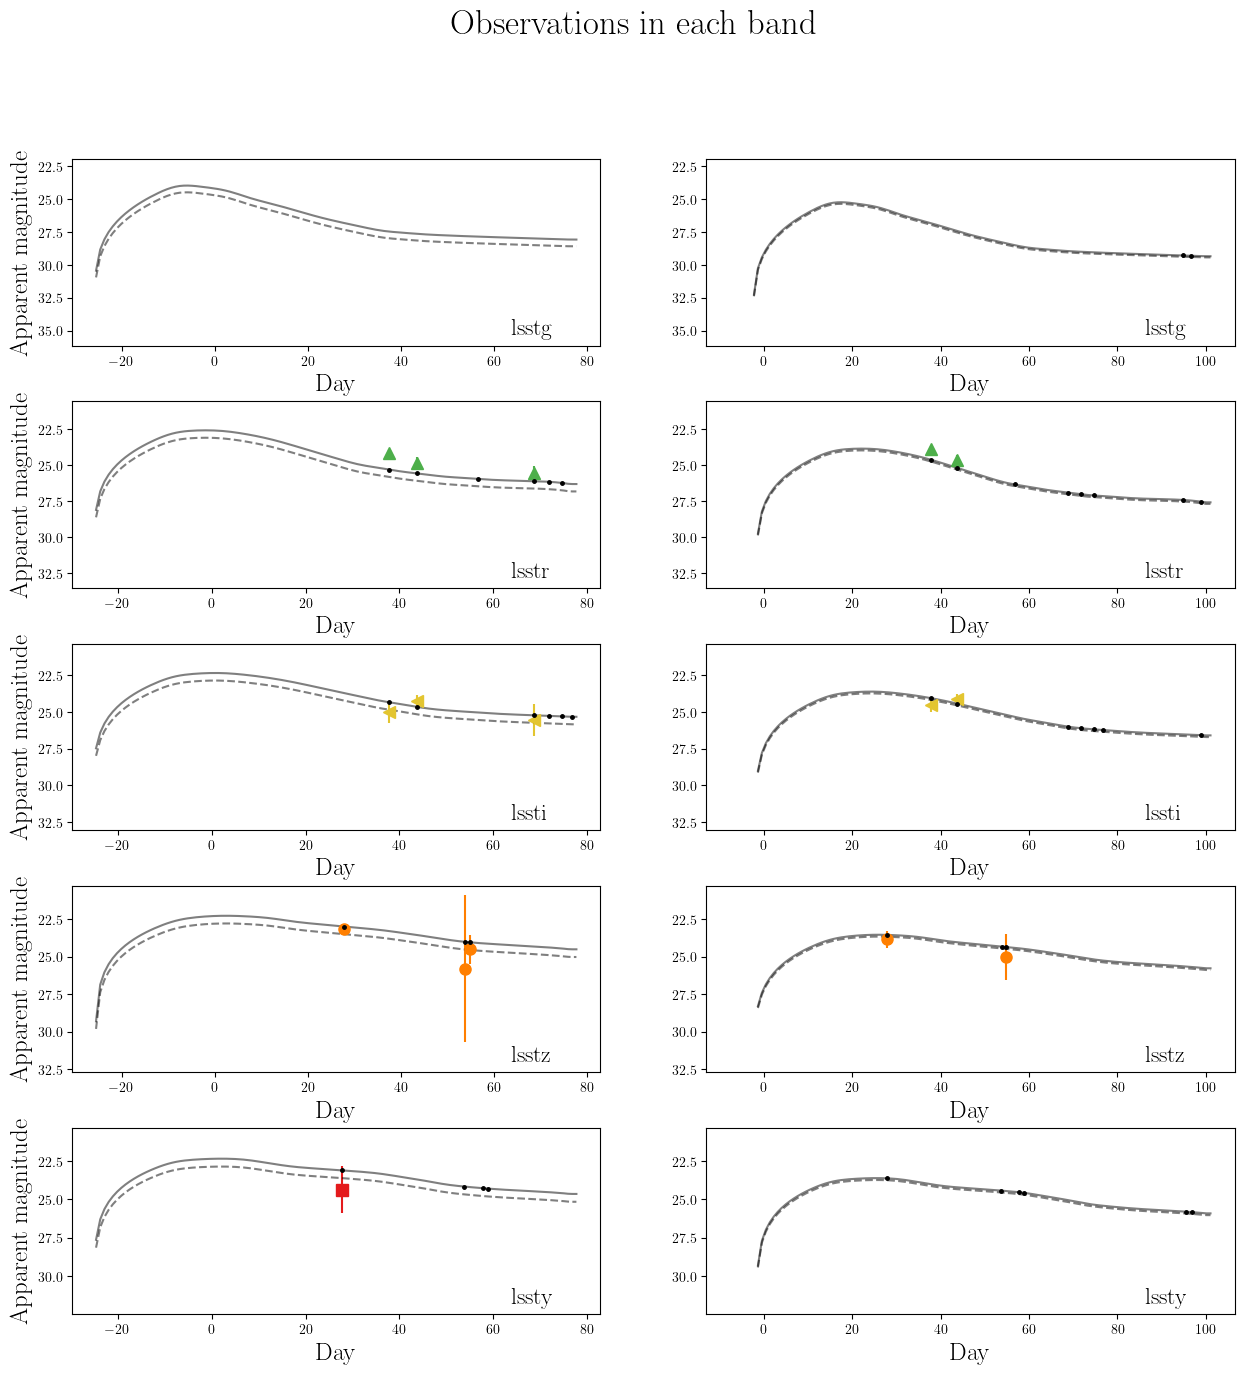

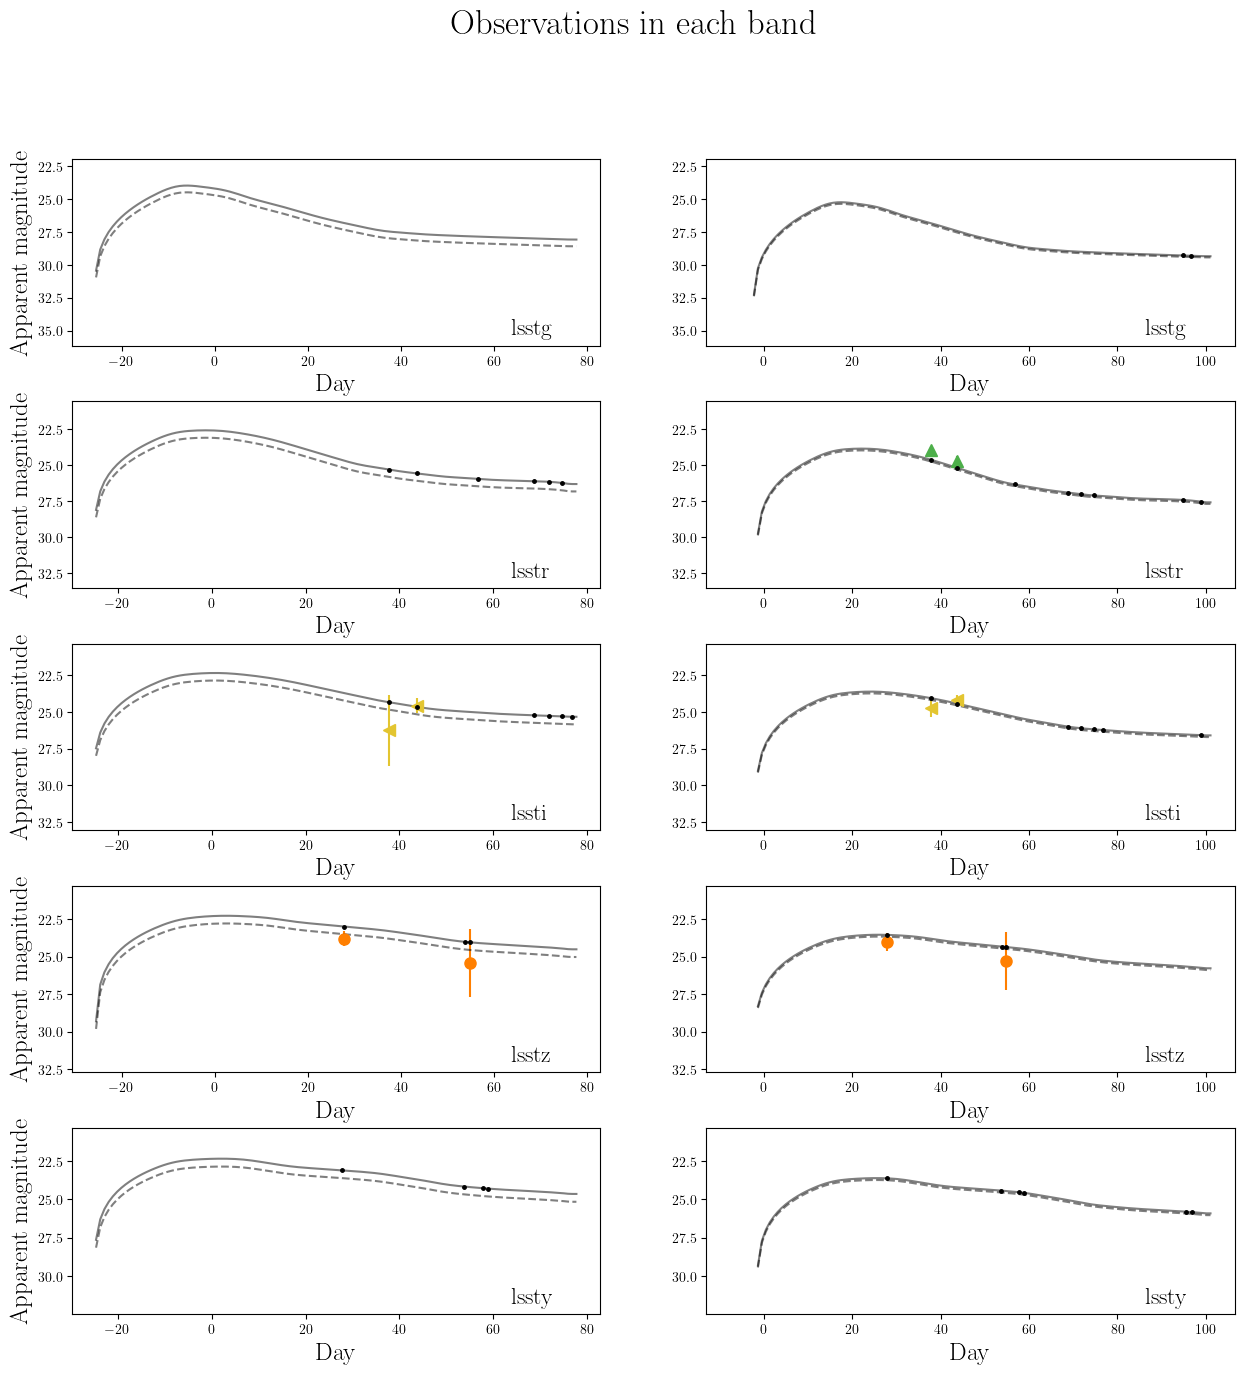

In [5]:
num_samples = 1  # 1000       # Total number of lens systems to be generated  
batch_size = 1  # 1000        # Number of lens systems that is saved together in a batch
batch = 1                     # Starting number of the batch
num_images = 2                # Choose between 2 (for doubles) and 4 (for quads)
obs_upper_limit = 200         # Upper limit of number of observations
obs_lower_limit = 5           # Lower limit of number of observations
fixed_H0 = True               # Bool, if False: vary H0. if True: fix H0 to 70 km/s/Mpc (for the evaluation set)
add_microlensing = True       # Bool, if False: Only macro magnification. if True: Add effects of microlensing

Show = True                   # Bool, if True: Show figures and print information about the lens systems
Save = False                  # Bool, if True: Save image time-series
path = "../processed_data/Baseline_v_3_0_/" # Path to folder in which to save the results


df, timings, theta_E_missed, mu_missed, zlens_missed, zsource_missed, Nim = simulate_time_series_images(num_samples, batch_size, batch, num_images, add_microlensing, 
                                 obs_lower_limit, obs_upper_limit, fixed_H0, lsst, Show, Save, path)

print(df)